<a href="https://colab.research.google.com/github/LuisErnestoColchado/population/blob/master/Population_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries 

In [0]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler((0,1))

Mount my google drive in colab (not elementary for you yet)


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


use of the GPU for greater computational capacity (not elementary for you yet)

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Read data in this case is data of Suecia

In [0]:
df = pd.read_csv('/content/drive/My Drive/datacsv.csv')

Write first five rows

In [0]:
df.head()

,year,population
0,1749,1764724
1,1750,1780678
2,1751,1802132
3,1752,1816703
4,1753,1837869


In [0]:
values = df.iloc[:,1]
print(values)

0       1764724
1       1780678
2       1802132
3       1816703
4       1837869
5       1857047
6       1875029
7       1889424
8       1892990
9       1893444
10      1905866
11      1925248
12      1942257
13      1949359
14      1952238
15      1966190
16      1976824
17      1992142
18      2009596
19      2020546
20      2030491
21      2042574
22      2050680
23      2032235
24      1977205
25      2000208
26      2020847
27      2041289
28      2057147
29      2073296
         ...   
240     8527036
241     8590630
242     8644119
243     8692013
244     8745109
245     8816381
246     8837496
247     8844499
248     8847625
249     8854322
250     8861426
251     8882792
252     8909128
253     8940788
254     8975670
255     9011392
256     9047752
257     9113257
258     9182927
259     9256347
260     9340682
261     9415570
262     9482855
263     9555893
264     9644864
265     9747355
266     9851017
267     9995153
268    10120242
269    10230185
Name: population, Length

Graph of population growth per year

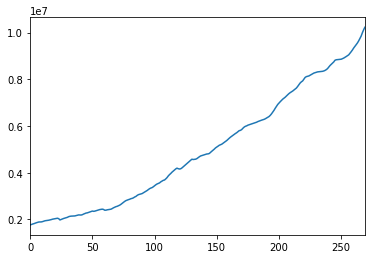

In [0]:
values = values.astype(float)
values.plot()
pyplot.show()

convert of pandas to numpy array 

In [0]:
values = values.values.copy()

# TIME SERIES FORECASTING

**input_seq_len** is the lag time 

**output_seq_len** is the forecasting 

In [0]:
input_seq_len = 8
output_seq_len = 1

Functions for preparing the data for time series

In [0]:
def generate_train_samples(x, y, batch_size=24, input_seq_len=input_seq_len,
                           output_seq_len=output_seq_len, replace = False):
    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx = np.random.choice(range(total_start_points), batch_size, replace=replace)

    input_batch_idxs = [list(range(i, i + input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis=0)

    output_batch_idxs = [list(range(i + input_seq_len, i + input_seq_len + output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis=0)

    return input_seq, output_seq  # in shape: (batch_size, time_steps, feature_dim)

def generate_test_samples(x, y, input_seq_len=input_seq_len, output_seq_len=output_seq_len):
    total_samples = x.shape[0]
    print(total_samples)
    input_batch_idxs = [list(range(i, i + input_seq_len)) for i in
                        range((total_samples - input_seq_len - output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis=0)

    output_batch_idxs = [list(range(i + input_seq_len, i + input_seq_len + output_seq_len)) for i in
                         range((total_samples - input_seq_len - output_seq_len))]
    output_seq = np.take(y, output_batch_idxs, axis=0)

    return input_seq, output_seq

In [0]:
X = values.reshape(270,1).astype(float)
Y = values.reshape(270,1).astype(float)

Convert population values in un range of 0 to 1 (normalization)

In [0]:
for i in range(0,X.shape[1]):
    currentFeature = X[:, i].reshape(X.shape[0],1)
    X[:, i] = scalar.fit_transform(currentFeature).reshape(X.shape[0])
    
Y = scalar.fit_transform(Y)

# ARIMA MODEL (IMPORTANT THAT YOU HAVE TO READ THEORY)

Implemented whit Library of Python


In [0]:
from statsmodels.tsa.arima_model import ARIMA
sizeTrain = int(X.shape[0] * 0.7)
train, test = X[0:sizeTrain], X[sizeTrain:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(input_seq_len,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
_y = scalar.inverse_transform(test)
_yhat = scalar.inverse_transform(predictions)
error = np.sqrt(mean_squared_error(_y, _yhat))
print('Test RMSE: %.3f' % error)

predicted=0.536314, expected=0.536945
predicted=0.539862, expected=0.540618
predicted=0.543998, expected=0.544177
predicted=0.547326, expected=0.548316
predicted=0.551980, expected=0.554427
predicted=0.559568, expected=0.562061
predicted=0.568183, expected=0.570864
predicted=0.577738, expected=0.579889
predicted=0.587094, expected=0.590513
predicted=0.599358, expected=0.599769
predicted=0.607577, expected=0.609555
predicted=0.617938, expected=0.616795
predicted=0.623328, expected=0.623369
predicted=0.629471, expected=0.630092
predicted=0.636539, expected=0.636218
predicted=0.641911, expected=0.641145
predicted=0.645868, expected=0.646148
predicted=0.650935, expected=0.652698
predicted=0.658941, expected=0.658472
predicted=0.663718, expected=0.664333
predicted=0.669562, expected=0.669184
predicted=0.673856, expected=0.673100
predicted=0.677115, expected=0.677251
predicted=0.681440, expected=0.682456
predicted=0.687327, expected=0.687077
predicted=0.691409, expected=0.692553
predicted=0.

In [0]:
def plot_test(final_preds_expand, test_y_expand):
    fig, ax = pyplot.subplots(figsize=(17,8))
    ax.set_title("Test Predictions vs. Real values")
    ax.plot(final_preds_expand, color = 'red', label = 'predicted')
    ax.plot(test_y_expand, color = 'blue', label = 'real')
    pyplot.legend(loc="upper left")
    pyplot.show()

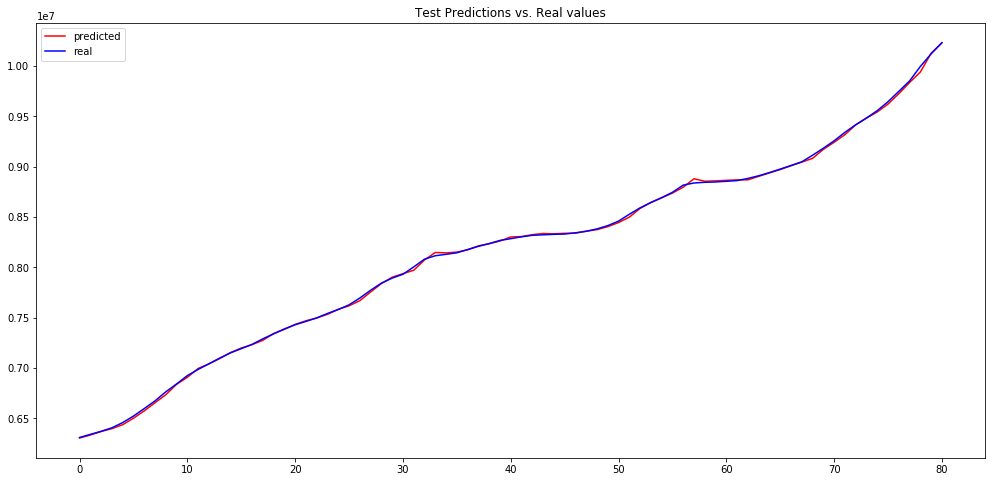

In [0]:
plot_test(_yhat,_y)



---



70% of data for TRAIN

30% of data for TEST 

In [0]:
X = values.reshape(270,1).astype(float)
Y = values.reshape(270,1).astype(float)

In [0]:
for i in range(0,X.shape[1]):
    currentFeature = X[:, i].reshape(X.shape[0],1)
    X[:, i] = scalar.fit_transform(currentFeature).reshape(X.shape[0])
    
Y = scalar.fit_transform(Y)

In [0]:
size_train = int(X.shape[0] * 0.7)
trainx = X[0:size_train].reshape(size_train,1)
trainy = Y[0:size_train].reshape(size_train,1)
testx = X[size_train:].reshape(int(X.shape[0] - size_train),1)
testy = Y[size_train:].reshape(int(X.shape[0] - size_train),1)

In [0]:
xTrain, yTrain = generate_train_samples(trainx,trainy,size_train,input_seq_len,output_seq_len,True)
xTest, yTest = generate_test_samples(testx, testy)

81


KERAS LIBRARY: Helps you develop artificial neural networks faster

In [0]:
from keras.models import Model, Sequential
from keras.layers import LSTM
from keras.layers import Dense, Input, concatenate

Using TensorFlow backend.


# MULTILAYER PERCEPTRON
numberNeuron_per_layer: define the number of neurons per hidden layer 


number of hidden layer = 2 layers 


loss: mean square error


optimization: adam 


In [0]:
batch_size = 16
numberNeuron_per_layer = 300

number_test = int(xTest.shape[0] / batch_size)
model = Sequential()
model.add(Dense(numberNeuron_per_layer, activation='sigmoid', input_dim=input_seq_len))
model.add(Dense(numberNeuron_per_layer, activation='sigmoid', input_dim=input_seq_len))
model.add(Dense(output_seq_len))
model.compile(optimizer='adam', loss='mse')
train_x = xTrain.reshape(xTrain.shape[0], input_seq_len)
train_y = yTrain.reshape(yTrain.shape[0], output_seq_len)
model.fit(train_x, train_y, epochs=30, batch_size=batch_size)

test_x = xTest[0:number_test,:].reshape(number_test,input_seq_len)
yTest = yTest[0:number_test, :].reshape(number_test,output_seq_len)
yhat = model.predict(test_x, batch_size=batch_size)

yhat = np.reshape(yhat, (number_test, output_seq_len))
yhatinv = scalar.inverse_transform(yhat).reshape(number_test,output_seq_len)
yinv = scalar.inverse_transform(yTest).reshape(number_test,output_seq_len)
rmseTest = np.sqrt(mean_squared_error(yinv, yhatinv))
print("RMSE ", rmseTest)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
189/189 [==============================] - 0s 3ms/step - loss: 0.1441
Epoch 2/30
189/189 [==============================] - 0s 171us/step - loss: 0.0564
Epoch 3/30
189/189 [==============================] - 0s 172us/step - loss: 0.0470
Epoch 4/30
189/189 [==============================] - 0s 172us/step - loss: 0.0269
Epoch 5/30
189/189 [==============================] - 0s 169us/step - loss: 0.0180
Epoch 6/30
189/189 [==============================] - 0s 173us/step - loss: 0.0150
Epoch 7/30
189/189 [==============================] - 0s 191us/step - loss: 0.0104
Epoch 8/30
189/189 [==============================] - 0s 171us/step - loss: 0.0073
Epoch 9/30
189/189 [==============================] - 0s 179us/step - loss: 0.0046
Epoch 10/30
189/189 [==============================] - 0s 167us/step - loss: 0.0060
Epoch 11/30
189/189 [==============================

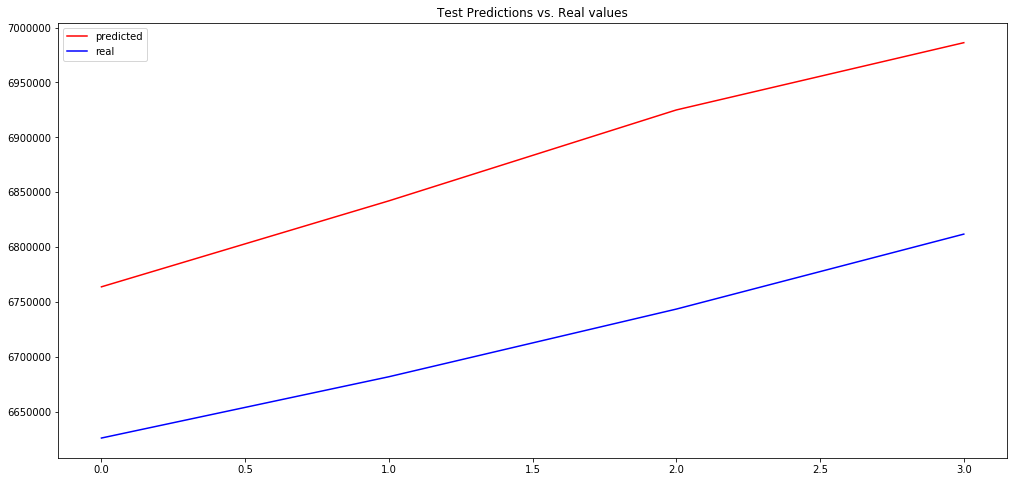

In [0]:
plot_test(yinv,yhatinv)

# LSTM:  Is a recurrent neural network. IMPORTANT THAT YOU HAVE TO READ THEORY (DEEP LEARNING BOOK)

In [0]:
X = values.reshape(270,1).astype(float)
Y = values.reshape(270,1).astype(float)

In [0]:
for i in range(0,X.shape[1]):
    currentFeature = X[:, i].reshape(X.shape[0],1)
    X[:, i] = scalar.fit_transform(currentFeature).reshape(X.shape[0])
    
Y = scalar.fit_transform(Y)

In [0]:
size_train = int(X.shape[0] * 0.7)
trainx = X[0:size_train].reshape(size_train,1)
trainy = Y[0:size_train].reshape(size_train,1)
testx = X[size_train:].reshape(int(X.shape[0] - size_train),1)
testy = Y[size_train:].reshape(int(X.shape[0] - size_train),1)

In [0]:
xTrain, yTrain = generate_train_samples(trainx,trainy,size_train,input_seq_len,output_seq_len,True)
xTest, yTest = generate_test_samples(testx, testy)

81


In [0]:
batch_size = 16
number_cells = 119
number_train = int(size_train - (size_train % batch_size))
number_test = int(xTest.shape[0] / batch_size)
model = Sequential()
model.add(LSTM(number_cells, batch_input_shape=(batch_size, xTrain.shape[1], xTrain.shape[2]), return_sequences=True))
model.add(LSTM(number_cells))
model.add(Dense(output_seq_len, activation='sigmoid'))
print(model.summary())
model.compile(loss='mae', optimizer='adam')

xTrain = np.reshape(xTrain[0:number_train], (number_train, input_seq_len,1))

yTrain = np.reshape(yTrain[0:number_train], (number_train, output_seq_len))

model.fit(xTrain, yTrain, epochs=100, batch_size=batch_size)

test_x = xTest[0:batch_size*number_test,:]
yTest = yTest[0:batch_size*number_test, :].reshape(batch_size*number_test,output_seq_len)
yhat = model.predict(test_x, batch_size=16)

yhat = np.reshape(yhat, (batch_size*number_test, output_seq_len))
predict = scalar.inverse_transform(yhat).reshape(batch_size*number_test,output_seq_len)
yy = scalar.inverse_transform(yTest).reshape(batch_size*number_test,output_seq_len)
rmseTest = np.sqrt(mean_squared_error(yinv, yhatinv))
print("RMSE ", rmseTest)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (16, 8, 119)              57596     
_________________________________________________________________
lstm_4 (LSTM)                (16, 119)                 113764    
_________________________________________________________________
dense_5 (Dense)              (16, 1)                   120       
Total params: 171,480
Trainable params: 171,480
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
176/176 [==============================] - 1s 6ms/step - loss: 0.2564
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1534
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1190
Epoch 5/100
176/176 [==============================] - 0s 1ms/step 

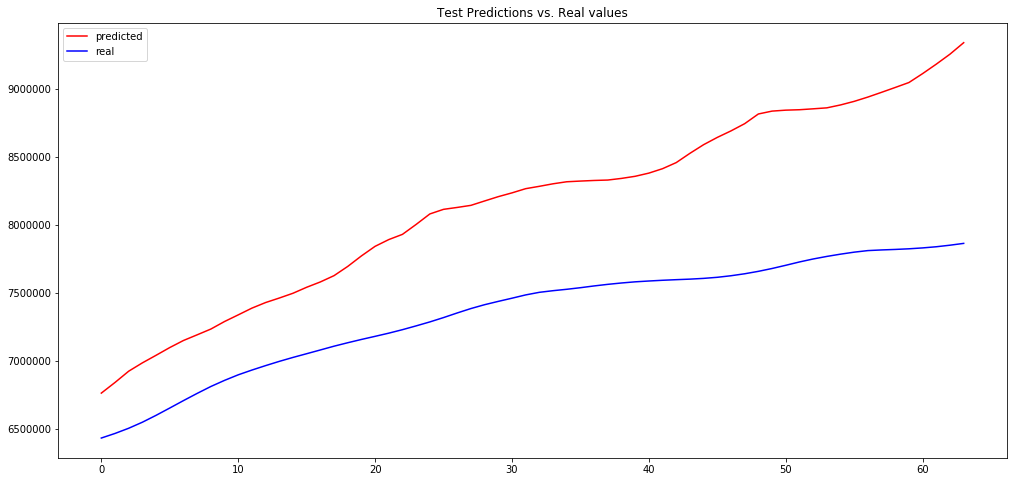

In [0]:
plot_test(yy,predict) 



---

